In [1]:
import numpy as np

In [2]:
import skfuzzy as fuzzy

In [3]:
from skfuzzy import control as ctrl

In [4]:
import matplotlib.pyplot as plt

In [5]:
# for temperatur as a parameter
temperature = ctrl.Antecedent(np.arange(0,45,1),'temperature')


In [6]:
temperature['very low'] = fuzzy.trimf(temperature.universe,[0,5,10])

In [7]:
temperature['low'] = fuzzy.trimf(temperature.universe,[10,15,20])

In [8]:
temperature['medium'] = fuzzy.trimf(temperature.universe,[20,22,28])

In [9]:
temperature['high'] = fuzzy.trimf(temperature.universe,[28,32,35])

In [10]:
temperature['very high'] = fuzzy.trimf(temperature.universe,[35,38,42])

c:\Users\bunny\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


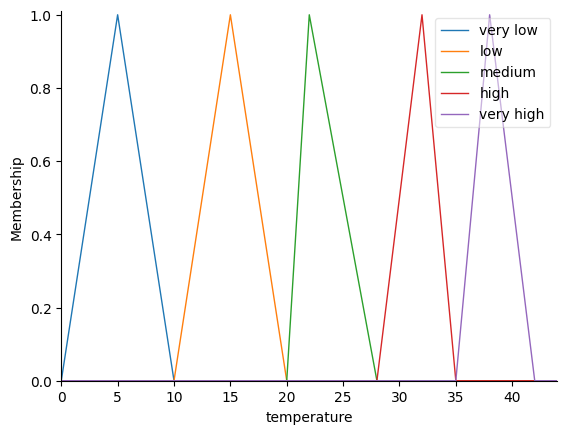

In [11]:
temperature.view()

In [12]:
#for humidity as a parameter
humidity = ctrl.Antecedent(np.arange(0,45,1),'humidity')



In [13]:
humidity['very low'] = fuzzy.trimf(humidity.universe,[0,5,10])

In [14]:
humidity['low'] = fuzzy.trimf(humidity.universe,[10,15,20])

In [15]:
humidity['medium'] = fuzzy.trimf(humidity.universe,[20,22,28])

In [16]:
humidity['high'] = fuzzy.trimf(humidity.universe,[28,32,35])

In [17]:
humidity['very high'] = fuzzy.trimf(humidity.universe,[35,38,42])

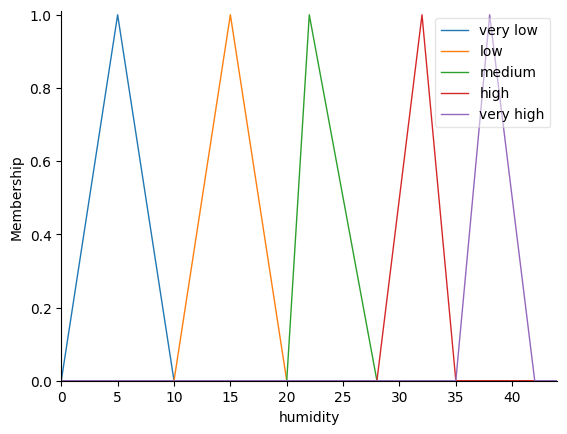

In [18]:
humidity.view()

In [19]:
#for outdoor conditions
outdoor = ctrl.Antecedent(np.arange(0,45,1),'outdoor')


In [20]:
outdoor['cool'] = fuzzy.trimf(outdoor.universe,[0,10,20])

In [21]:
outdoor['hot'] = fuzzy.trimf(outdoor.universe,[20,30,40])

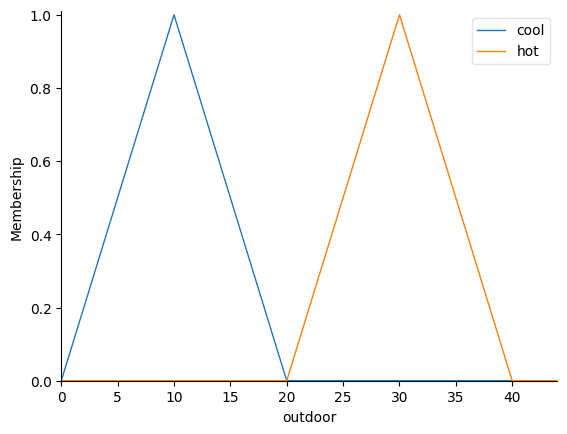

In [22]:
outdoor.view()

In [23]:
# for indoor conditions 
indoor = ctrl.Antecedent(np.arange(0,25,1),'indoor')



In [24]:
indoor['cool'] = fuzzy.trimf(indoor.universe,[0,10,15])

In [25]:
indoor['hot'] = fuzzy.trimf(indoor.universe,[15,20,24])

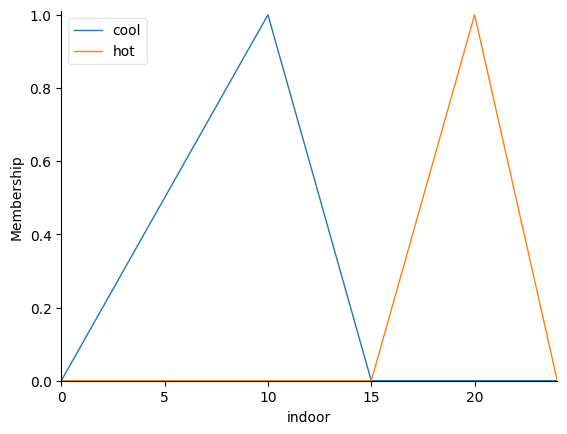

In [26]:
indoor.view()

In [27]:
# output for  rotation speed of fan
speed_of_motor = ctrl.Consequent(np.arange(100,550,1),'speed')

In [28]:
speed_of_motor['slow'] = fuzzy.trimf(speed_of_motor.universe,[100,150,200])

In [29]:
speed_of_motor['medium'] = fuzzy.trimf(speed_of_motor.universe,[200,250,300])

In [30]:
speed_of_motor['fast'] = fuzzy.trimf(speed_of_motor.universe,[300,350,400])

In [31]:
speed_of_motor['very fast'] = fuzzy.trimf(speed_of_motor.universe,[400,450,500])

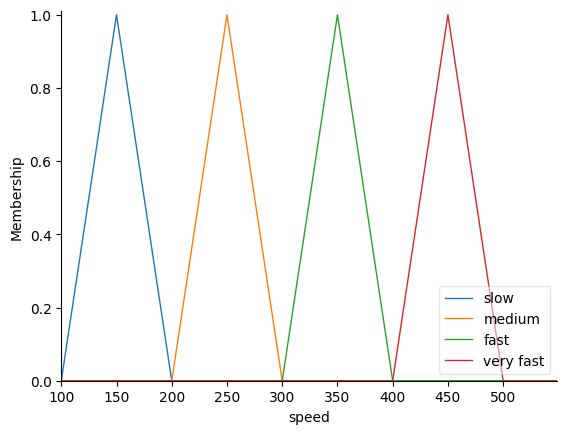

In [32]:
speed_of_motor.view()

In [33]:
#output of water pump or nitrogen coolent

pump = ctrl.Consequent(np.arange(0,3,1),'pump')


In [34]:
pump['off'] = fuzzy.trimf(pump.universe,[0,0,1])

In [35]:
pump['on'] = fuzzy.trimf(pump.universe,[1,2,2])

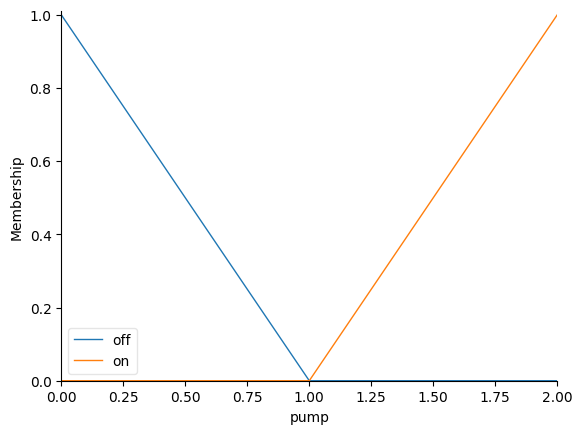

In [36]:
pump.view()

In [37]:
# rule base
rule1 = ctrl.Rule(temperature['very low']& humidity['very low']& outdoor['cool']& indoor['cool'] ,[speed_of_motor['slow'], pump['off']])

In [38]:
rule2 = ctrl.Rule(temperature['low']& humidity['low']& outdoor['cool']& indoor['cool'] ,[speed_of_motor['slow'],pump['off']])

In [39]:
rule3 = ctrl.Rule(temperature['medium']& humidity['medium']& outdoor['cool']& indoor['cool'] ,[speed_of_motor['medium'],pump['off']])

In [40]:
rule4 = ctrl.Rule(temperature['high']& humidity['high']& outdoor['hot']& indoor['hot'] ,[speed_of_motor['fast'],pump['on']])

In [41]:
rule5 = ctrl.Rule(temperature['very high']& humidity['very high']& outdoor['hot']& indoor['hot'] ,[speed_of_motor['very fast'],pump['on']])

In [42]:
rule6 = ctrl.Rule(temperature['very low']& humidity['low']& outdoor['cool']& indoor['hot'] ,[speed_of_motor['fast'],pump['off']])

In [43]:
rule7 = ctrl.Rule(temperature['very high']& humidity['medium']& outdoor['hot']& indoor['cool'] ,[speed_of_motor['fast'],pump['off']])

In [44]:
rule8 = ctrl.Rule(temperature['medium']& humidity['high']& outdoor['hot']& indoor['hot'] ,[speed_of_motor['fast'],pump['on']])

In [45]:
rule9 = ctrl.Rule(temperature['very high']& humidity['high']& outdoor['hot']& indoor['hot'] ,[speed_of_motor['very fast'],pump['on']])

In [46]:
rule10 = ctrl.Rule(temperature['low']& humidity['high']& outdoor['cool']& indoor['hot'] ,[speed_of_motor['medium'],pump['on']])

In [47]:
calculate = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])

In [48]:
status = ctrl.ControlSystemSimulation(calculate)

In [49]:
status.input['temperature'] = 6

In [50]:
status.input['humidity'] = 7

In [51]:
status.input['outdoor'] = 8

In [52]:
status.input['indoor'] = 5

In [53]:
status.compute()

In [54]:
print(status.output)

OrderedDict([('speed', 149.99999999999991), ('pump', 0.38888888888888884)])


In [55]:
type(status.output)

collections.OrderedDict

In [56]:
a = status.output

In [57]:
pump_status = ''
if float(a['pump']) < 0.5:
    pump_status = 'off'
else :
    pump_status = 'on' 

In [58]:
print('speed of the fan is: ' + str(int(a['speed']))+' rpm')  
print('the coolent is '+ pump_status) 

speed of the fan is: 149 rpm
the coolent is off
